### ANALISIS EXPLORATORIO DE DATOS - EDA

Importamos las librerias requeridas para el EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
from wordcloud import WordCloud, ImageColorGenerator
warnings.filterwarnings('ignore')
sns.set_theme()

Cargamos el archivo a utilizar

In [2]:
clean_games = pd.read_csv("clean_games.csv", sep=';', encoding='utf-8')

In [7]:
# Visualizamos los datos
print(clean_games.shape)
clean_games.head(5)

(32135, 13)


,id,publisher,genres,app_name,tags,specs,early_access,developer,sentiment,metascore,release_year,free to play,real_price
0,761140.0,Kotoshiro,"Action, Casual, Indie, Simulation, Strategy",Lost Summoner Kitty,"Strategy, Action, Indie, Casual, Simulation",Single-player,False,Kotoshiro,NO,NO,2018.0,NO,4.99
1,643980.0,"Making Fun, Inc.","Free to Play, Indie, RPG, Strategy",Ironbound,"Free to Play, Strategy, Indie, RPG, Card Game,...","Single-player, Multi-player, Online Multi-Play...",False,Secret Level SRL,Mostly Positive,NO,2018.0,Free To Play,0.00
2,670290.0,Poolians.com,"Casual, Free to Play, Indie, Simulation, Sports",Real Pool 3D - Poolians,"Free to Play, Simulation, Sports, Casual, Indi...","Single-player, Multi-player, Online Multi-Play...",False,Poolians.com,Mostly Positive,NO,2017.0,Free to Play,0.00
3,767400.0,彼岸领域,"Action, Adventure, Casual",弹炸人2222,"Action, Adventure, Casual",Single-player,False,彼岸领域,NO,NO,2017.0,NO,0.99
4,773570.0,NO,NaN,Log Challenge,"Action, Indie, Casual, Sports","Single-player, Full controller support, HTC Vi...",False,NO,NO,NO,0.0,NO,2.99


In [8]:
# Informacion general de los datos
clean_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32135 entries, 0 to 32134
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            32133 non-null  float64
 1   publisher     32116 non-null  object 
 2   genres        28852 non-null  object 
 3   app_name      32135 non-null  object 
 4   tags          31972 non-null  object 
 5   specs         31465 non-null  object 
 6   early_access  32135 non-null  bool   
 7   developer     32135 non-null  object 
 8   sentiment     32135 non-null  object 
 9   metascore     32065 non-null  object 
 10  release_year  32135 non-null  float64
 11  free to play  32135 non-null  object 
 12  real_price    32135 non-null  float64
dtypes: bool(1), float64(3), object(9)
memory usage: 3.0+ MB


In [9]:
# Hacemos un conteo de los nulos
clean_games.isnull().sum()

id                 2
publisher         19
genres          3283
app_name           0
tags             163
specs            670
early_access       0
developer          0
sentiment          0
metascore         70
release_year       0
free to play       0
real_price         0
dtype: int64

In [10]:
# Realizamos una descripcion estadistica de los datos
clean_games.describe()

,id,release_year,real_price
count,3.213300e+04,32135.000000,32135.000000
mean,4.517574e+05,1867.296468,8.516406
std,1.827140e+05,524.763314,16.088117
min,1.000000e+01,0.000000,0.000000
25%,3.292800e+05,2014.000000,1.990000
50%,4.520600e+05,2016.000000,4.990000
75%,5.934000e+05,2017.000000,9.990000
max,2.028850e+06,2021.000000,995.000000


In [11]:
# Realizamos una descripcion estadistica de tipo texto
tipo_texto = clean_games.select_dtypes(include=['object']).columns
df_texto = clean_games[tipo_texto]
df_texto.describe()

,publisher,genres,app_name,tags,specs,developer,sentiment,metascore,free to play
count,32116,28852,32135,31972,31465,32135,32135,32065,32135
unique,8237,883,32095,15395,4649,10993,19,71,18
top,NO,Action,Soundtrack,"Casual, Simulation",Single-player,NO,NO,NO,NO
freq,8052,1880,3,1292,2794,3299,7182,29458,30225


Mapa de calor con las corelaciones

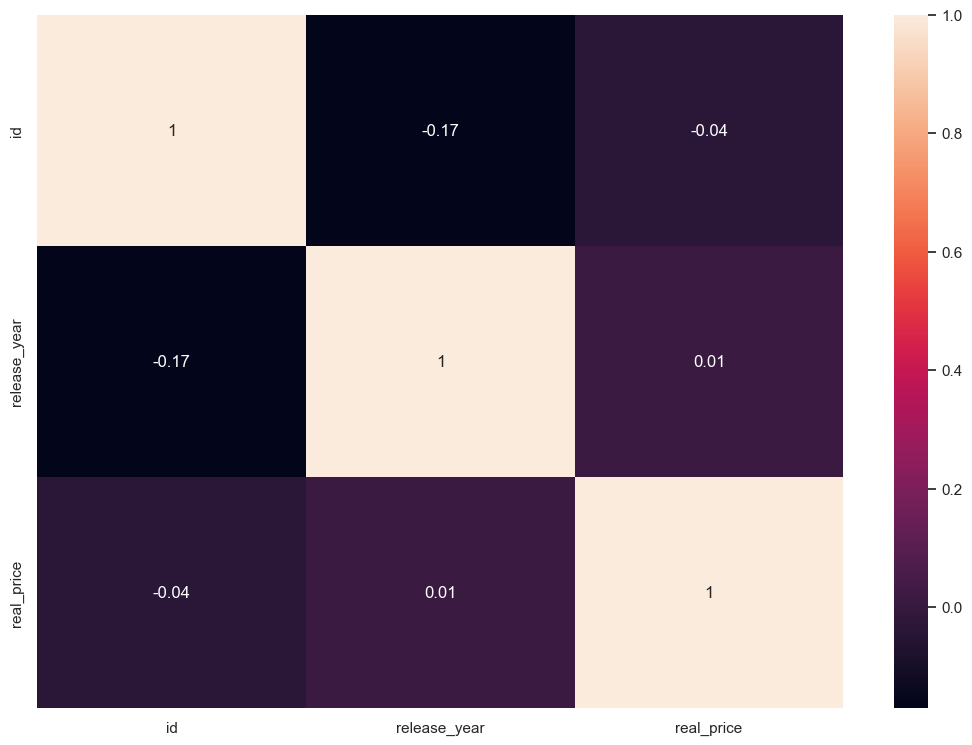

In [14]:
# Generamos un mapa de calor con las correlaciones de los datos
df_numerico = clean_games.select_dtypes(include=['number']) 
corr = df_numerico.corr().round(2)
plt.figure(figsize=(13,9))
sns.heatmap(data=corr, annot=True)
plt.show()

Buscamos valores atipicos 

In [15]:
Q1 = df_numerico.quantile(0.25)
Q3 = df_numerico.quantile(0.75)
IQR = Q3 - Q1 
limite_inf = Q1 - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR
mascaras = (df_numerico < limite_inf) | (df_numerico > limite_sup)
valores_atipicos = df_numerico[mascaras]
valores_atipicos

,id,release_year,real_price
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,0.0,NaN
...,...,...,...
32130,NaN,NaN,NaN
32131,NaN,NaN,NaN
32132,NaN,NaN,NaN
32133,NaN,NaN,NaN


Realizamos un pequeno histograma

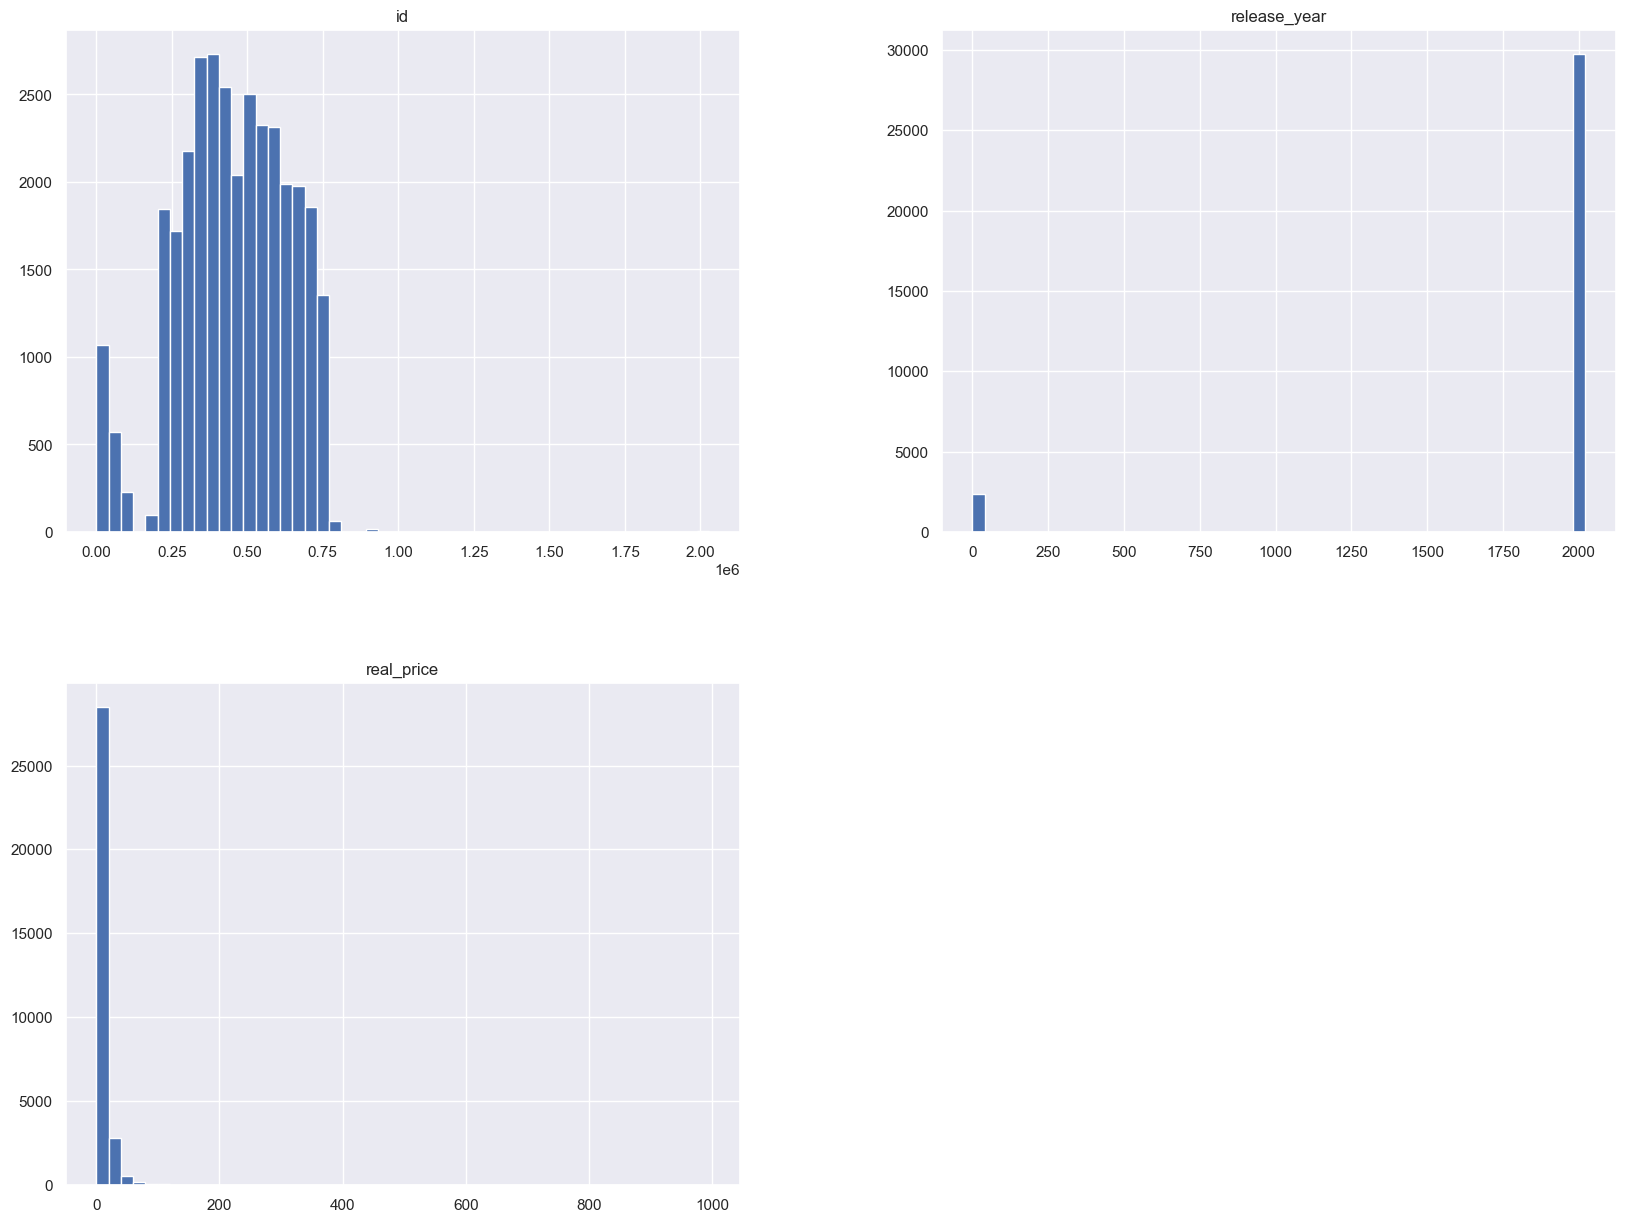

In [16]:
clean_games.hist(bins = 50, figsize= (20,15))
plt.show()

Generamos una nube de palabras

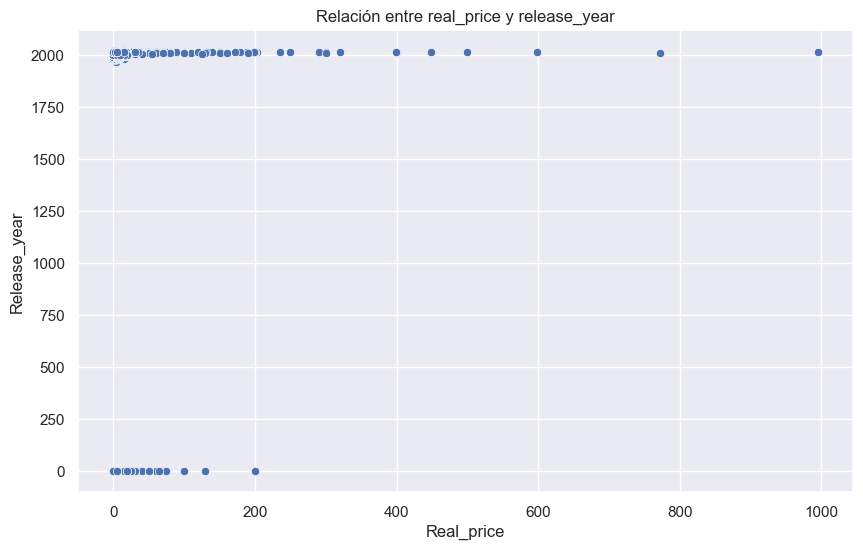

In [18]:
# Destacar un patrón importante
# Veamos la relación entre el budget y la revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clean_games, x='real_price', y='release_year')
plt.title('Relación entre real_price y release_year')
plt.xlabel('Real_price')
plt.ylabel('Release_year')
plt.show()


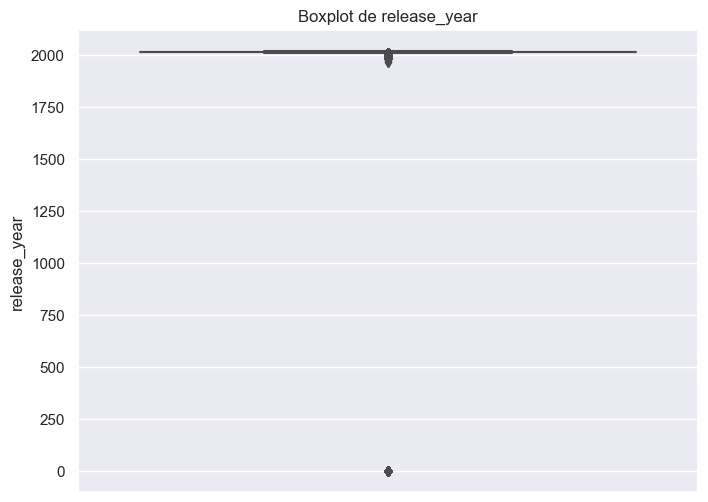

In [19]:
# Destacar los outliers
# Veamos el boxplot de la variable 'genres'
plt.figure(figsize=(8, 6))
sns.boxplot(data=clean_games, y='release_year')
plt.title('Boxplot de release_year')
plt.ylabel('release_year')
plt.show()

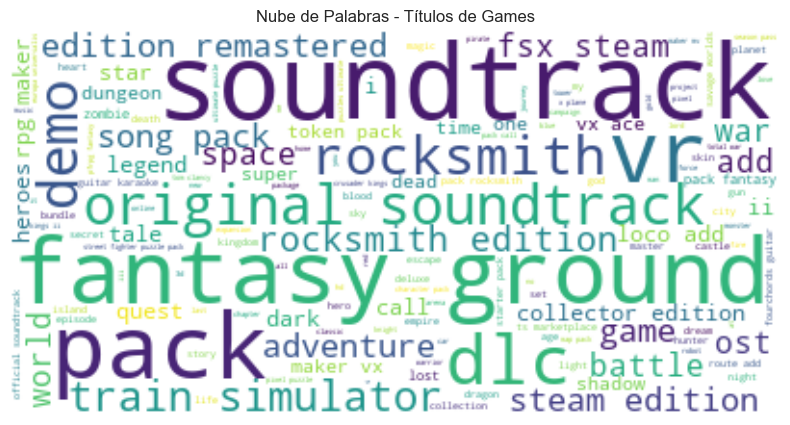

In [30]:
# Generamos una nube de palabras de la columna 'app_name'
title_words = ' '.join(clean_games['app_name'])
title_words = title_words.lower()
stopwords = ["to", "of", "the", "and", "&", ":", "in", "for", "on", "a", "by", "with", "an", "into", "from"]
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(title_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Títulos de Games')
plt.show()

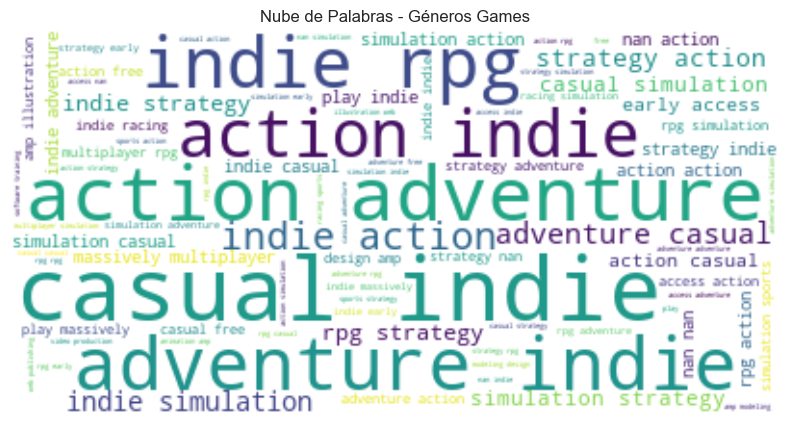

In [29]:
# Generamos una nube de palabras de la columna 'genres'
title_words = ' '.join(clean_games['genres'].astype(str))
title_words = title_words.lower()
stopwords = ["to", "of", "the", "and", "&", ":", "in", "for", "on", "a", "by", "with", "an", "into", "from"]
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(title_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Géneros Games')
plt.show()

Realizamos un conteo de las columnas mas relevantes

In [32]:
# Hacemos un conteo en la columna 'genres'
clean_games['genres'] = clean_games['genres'].astype(str)
genres_counts = clean_games['genres'].value_counts().sort_values(ascending=False)
print(genres_counts)

genres
nan                                                                      3283
Action                                                                   1880
Action, Indie                                                            1650
Simulation                                                               1396
Casual, Simulation                                                       1359
                                                                         ... 
Casual, Indie, Massively Multiplayer, Racing                                1
Action, Adventure, Casual, Free to Play, Indie, Massively Multiplayer       1
Racing, RPG, Simulation, Early Access                                       1
Animation &amp; Modeling, Design &amp; Illustration, Education              1
Adventure, Casual, RPG, Simulation, Early Access                            1
Name: count, Length: 884, dtype: int64


In [34]:
# Hacemos un conteo en la columna 'specs'
clean_games['specs'] = clean_games['specs'].astype(str)
specs_counts = clean_games['specs'].value_counts().sort_values(ascending=False)
print(specs_counts)

specs
Single-player                                                                                                                                                     2794
Single-player, Downloadable Content                                                                                                                               1204
Single-player, Shared/Split Screen, Downloadable Content, Steam Achievements, Steam Trading Cards, Partial Controller Support, Steam Cloud, Steam Leaderboards    1015
Single-player, Steam Achievements                                                                                                                                  824
Multi-player, Co-op, Cross-Platform Multiplayer, Downloadable Content                                                                                              756
                                                                                                                                                               

In [35]:
# Hacemos un conteo en la columna 'sentiment'
clean_games['sentiment'] = clean_games['sentiment'].astype(str)
sentiment_counts = clean_games['sentiment'].value_counts().sort_values(ascending=False)
print(sentiment_counts)

sentiment
NO                         7182
Mixed                      4103
Very Positive              3868
Positive                   3281
Mostly Positive            2744
1 user reviews             2496
2 user reviews             1756
3 user reviews             1231
4 user reviews              964
5 user reviews              846
Mostly Negative             802
6 user reviews              756
7 user reviews              619
8 user reviews              537
9 user reviews              488
Overwhelmingly Positive     303
Negative                    123
Very Negative                29
Overwhelmingly Negative       7
Name: count, dtype: int64


In [36]:
# Hacemos un conteo en la columna 'metascore'
clean_games['metascore'] = clean_games['metascore'].astype(str)
metascore_counts = clean_games['metascore'].value_counts().sort_values(ascending=False)
print(metascore_counts)

metascore
NO    29458
80      125
74      107
77      104
75      103
      ...  
95        1
34        1
20        1
24        1
30        1
Name: count, Length: 72, dtype: int64


Generamos una grafica con los juegos por anios

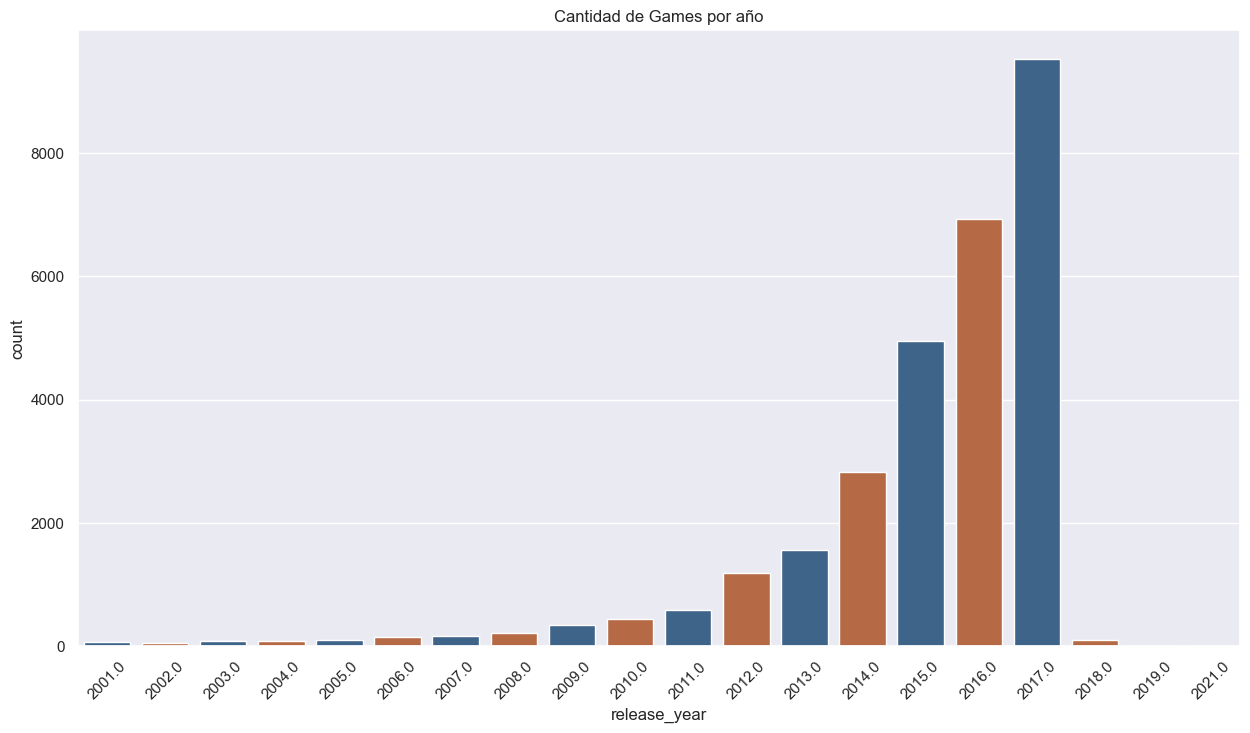

In [38]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(15, 8))

# Definir los colores corporativos utilizando valores RGB
color1 = (50/255, 100/255, 150/255)  # Ejemplo de color corporativo 1
color2 = (200/255, 100/255, 50/255)  # Ejemplo de color corporativo 2

# Crear una lista de colores personalizados
colors = [color1, color2]

# Crear el gráfico de barras utilizando seaborn y los colores personalizados
plot = sns.countplot(x=clean_games['release_year'][clean_games['release_year'] > 2000], palette=colors)

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Agregar título al gráfico
plt.title('Cantidad de Games por año')

# Mostrar el gráfico
plt.show()

In [45]:
clean_games['genres'] = clean_games['genres'].replace('nan', 'NO').astype(str)

In [46]:
clean_games.head()

,id,publisher,genres,app_name,tags,specs,early_access,developer,sentiment,metascore,release_year,free to play,real_price
0,761140.0,Kotoshiro,"Action, Casual, Indie, Simulation, Strategy",Lost Summoner Kitty,"Strategy, Action, Indie, Casual, Simulation",Single-player,False,Kotoshiro,NO,NO,2018.0,NO,4.99
1,643980.0,"Making Fun, Inc.","Free to Play, Indie, RPG, Strategy",Ironbound,"Free to Play, Strategy, Indie, RPG, Card Game,...","Single-player, Multi-player, Online Multi-Play...",False,Secret Level SRL,Mostly Positive,NO,2018.0,Free To Play,0.00
2,670290.0,Poolians.com,"Casual, Free to Play, Indie, Simulation, Sports",Real Pool 3D - Poolians,"Free to Play, Simulation, Sports, Casual, Indi...","Single-player, Multi-player, Online Multi-Play...",False,Poolians.com,Mostly Positive,NO,2017.0,Free to Play,0.00
3,767400.0,彼岸领域,"Action, Adventure, Casual",弹炸人2222,"Action, Adventure, Casual",Single-player,False,彼岸领域,NO,NO,2017.0,NO,0.99
4,773570.0,NO,NO,Log Challenge,"Action, Indie, Casual, Sports","Single-player, Full controller support, HTC Vi...",False,NO,NO,NO,0.0,NO,2.99
